<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Group250_Anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team:

NAVIN APPUKUTTAN NAIR - 2021fc04720

N VISWANATHAN - 2021fc04318

RAKESH VITTA - 2021fc04673

Dataset:

Anamoly Detection

Location of the Dataset: https://drive.google.com/file/d/1n3hnxH9FPlGJVrbJgXr0fcLpNOvVDJQ-/view?usp=sharing 

<b>Import Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Import Dataset into the Notebook

In [2]:
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/Anamoly.csv'
df = pd.read_csv(url)

Data Visualization and Exploration



1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them. ✅
2. Comment on class imbalance with appropriate visualization method. ✅
3. Provide appropriate visualizations to get an insight about the dataset. ❌
4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer. Answers without 
justification will not be awarded marks. ❌
5. Any other visualization specific to the problem statement. ❌




1. Print 2 rows for sanity check

In [3]:
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [7]:
df.iloc[:2,:20]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.iloc[:2,21:]

,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [4]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

2. Comment on class imbalance with appropriate visualization method.

In [9]:
#Check the data type of the class and printing the values it takes and counts for each value
df['class'].dtypes
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

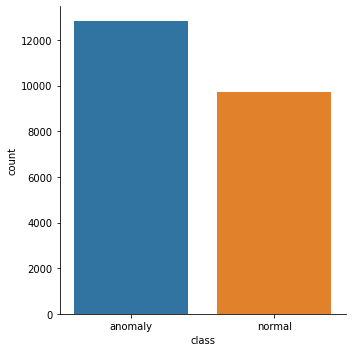

In [12]:
#Looking at the values the dataset is not imbalanced. Visualize the balance:
plot = sns.catplot(x="class", kind="count",  data=df)

*From the plot we can see there is no clear imbalance between the classes in the given data set.*





Provide appropriate visualizations to get an insight about the dataset.


<b> Data Preprocessing and Cleaning </b>


1.  Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.  ❌
2.   Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks.  Explore a few techniques for identifying feature importance for your feature engineering task. ❌






<b> Model Building </b>


1.   Split the dataset into training and test sets. Answers without justification will not be awarded marks. ❌

Case 1 :   Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; 

   [ x_test1,y_test1] = 20% ; 

Case 2 :   Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; 

[ x_test2,y_test2] = 90%  

2.   Explore k-fold cross validation. ❌
3. Model the classifier using GaussianNB, BernoulliNB, and Multinomial NB.  
4. Explore the need of regularization and incorporate few relevant techniques for the problem statement. ❌
5. Compare models with and without regularization in a tabular format and justify the findings. ❌



<b> Performance Evaluation </b>


1.   Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer. Answers without justification will not be awarded marks. ❌ 
2. Comment on underfitting/overfitting/just right model. Justify your comment. 
Answers without justification will not be awarded marks. ❌


